 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [115]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import os
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_data = Path("./Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_data.sort_index(inplace=True)


In [7]:
# Count nulls
whale_data.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [8]:
# Drop nulls
whale_data.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [58]:
whale_returns = whale_data.pct_change()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [59]:
# Reading algorithmic returns
algo_data = Path("./Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data.sort_index(inplace=True)



In [60]:
# Count nulls
algo_data.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [61]:
algo_data.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [62]:
algo_returns = algo_data.pct_change()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,NaN,NaN
2014-05-29,1.280156,NaN
2014-05-30,0.122192,NaN
2014-06-02,0.275137,NaN
2014-06-03,-0.070296,NaN


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [68]:
# Reading S&P 500 Closing Prices
sp500_data = Path("./Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_data.sort_index(inplace=True)
sp500_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [69]:
# Check Data Typeas
sp500_data.dtypes

Close    object
dtype: object

In [70]:
# Fix Data Types

sp500_data["Close"] = sp500_data["Close"].str.replace("$","").astype("float")


In [71]:
sp500_data["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [72]:
# Calculate Daily Returns
sp500_returns = sp500_data.sort_index().pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [73]:
# Drop nulls
sp500_data.dropna()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [74]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data.rename(columns = {'Close':'sp500'}, inplace = True)
sp500_data.head()

,sp500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [75]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_data, algo_data, sp500_data], axis="columns", join="inner")
combined_df.sort_index()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,2117.39
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [76]:
# Plot daily returns of all portfolios
combined_returns = combined_df.sort_index().pct_change().dropna()
#all_returns.head()
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-0.016961


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

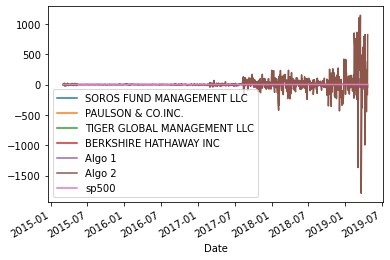

In [77]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [78]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [81]:
# Calculate the daily standard deviations of all portfolios
cumulative_std = cumulative_returns.std()
cumulative_std


SOROS FUND MANAGEMENT LLC        4.141413
PAULSON & CO.INC.                0.857016
TIGER GLOBAL MANAGEMENT LLC     11.642719
BERKSHIRE HATHAWAY INC           1.016634
Algo 1                           9.907794
Algo 2                         142.384498
sp500                            0.134280
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [82]:
# Calculate  the daily standard deviation of S&P 500
daily_std = sp500_returns.std()
daily_std


Close    0.008111
dtype: float64

In [83]:
# Determine which portfolios are riskier than the S&P 500
cumulative_std = cumulative_returns.std()
cumulative_std

SOROS FUND MANAGEMENT LLC        4.141413
PAULSON & CO.INC.                0.857016
TIGER GLOBAL MANAGEMENT LLC     11.642719
BERKSHIRE HATHAWAY INC           1.016634
Algo 1                           9.907794
Algo 2                         142.384498
sp500                            0.134280
dtype: float64

### Calculate the Annualized Standard Deviation

In [86]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = cumulative_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC        65.742895
PAULSON & CO.INC.                13.604712
TIGER GLOBAL MANAGEMENT LLC     184.822430
BERKSHIRE HATHAWAY INC           16.138565
Algo 1                          157.281353
Algo 2                         2260.283834
sp500                             2.131636
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

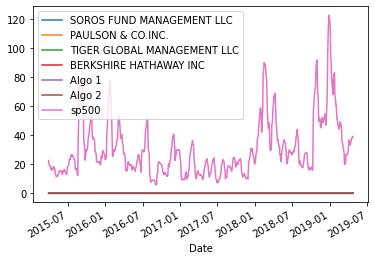

In [94]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [89]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios



In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [110]:
# Reading data from 1st stock
rydaf_data = Path("./data/rydaf_historical.csv")
rydaf_data = pd.read_csv(rydaf_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
rydaf_data.sort_index(inplace=True)
rydaf_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-04-06,$18.276,123858,$18.94,$18.94,$17.92
2020-04-07,$18.85,42236,$19.31,$19.44,$18.51
2020-04-08,$19.03,31882,$18.84,$19.03,$18.18
2020-04-09,$18.95,67050,$19.03,$19.55,$18.95
2020-04-13,$18.74,23052,$19.05,$19.75,$18.65


In [111]:
# Reading data from 2nd stock
cvx_data = Path("./data/cvx_historical.csv")
cvx_data = pd.read_csv(cvx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cvx_data.sort_index(inplace=True)
cvx_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-04-06,$80.39,17334920,$77,$80.95,$75.51
2020-04-07,$80.92,16394790,$84.26,$85.69,$80.85
2020-04-08,$85.98,12284850,$82.29,$86.3,$81.52
2020-04-09,$84.31,17048550,$88.74,$89.91,$81.52
2020-04-13,$84.91,13854680,$87.18,$87.36,$83.4


In [112]:
# Reading data from 3rd stock
xom_data = Path("./data/xom_historical.csv")
xom_data = pd.read_csv(xom_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xom_data.sort_index(inplace=True)


In [117]:
# Combine all stocks in a single DataFrame
os.listdir("./data")
stock_data = []
for file in os.listdir("./data"):
    stock_data.append(pd.read_csv(f"./data/{file}"))
stock_data[0]

,Date,Close/Last,Volume,Open,High,Low
0,04/05/2021,$104.51,8692709,$105.73,$105.83,$104.17
1,04/01/2021,$105.75,8515750,$105.26,$105.86,$104.21
2,03/31/2021,$104.79,8954377,$105.55,$106.22,$104.6
3,03/30/2021,$105.93,6284594,$106.06,$106.83,$105.59
4,03/29/2021,$106.92,7542327,$106.4,$107.53,$105.7
...,...,...,...,...,...,...
246,04/13/2020,$84.91,13854680,$87.18,$87.36,$83.4
247,04/09/2020,$84.31,17048550,$88.74,$89.91,$81.52
248,04/08/2020,$85.98,12284850,$82.29,$86.3,$81.52
249,04/07/2020,$80.92,16394790,$84.26,$85.69,$80.85


In [121]:
# Reset Date index
stock_data = []
stock_names = os.listdir("./data")
for file in stock_names:
    stock_data.append(read_stock_csv(file))
stock_data[0]


def read_stock_csv(stock_file):
    df = pd.read_csv(
        f"./data/{stock_file}",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True)
    try:
        return df["Close/Last"].str.replace("$","").astype("float")
    except:
        return df["Close/Last"]

In [133]:
# Reorganize portfolio data by having a column per symbol
df = pd.concat(stock_data, axis="columns", join="inner")
df.columns = ["RYDAF", "CVX", "XOM"]
df.tail()

,RYDAF,CVX,XOM
Date,,,
2021-03-11,111.19,21.78,61.31
2021-03-10,111.37,21.90,61.77
2021-03-09,109.50,21.23,59.93
2021-03-08,109.75,21.24,60.87
2021-03-05,109.00,21.65,60.93


In [134]:
# Calculate daily returns
returns = df.sort_index().pct_change()
# Drop NAs
df.dropna()
# Display sample data
returns.head()

,RYDAF,CVX,XOM
Date,,,
2021-03-05,NaN,NaN,NaN
2021-03-08,0.006881,-0.018938,-0.000985
2021-03-09,-0.002278,-0.000471,-0.015443
2021-03-10,0.017078,0.031559,0.030702
2021-03-11,-0.001616,-0.005479,-0.007447


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [135]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = returns.dot(weights)
# Display sample data
portfolio_returns.tail()

Date
2021-03-29   -0.006193
2021-03-30   -0.008385
2021-03-31   -0.011340
2021-04-01    0.010329
2021-04-05   -0.009933
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [142]:
# Join your returns DataFrame to the original returns DataFrame
#all_returns = pd.concat([returns], axis='columns', join='inner')
#all_returns.head()

In [143]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [144]:
# Calculate the annualized `std`
returns.std().sort_values() * np.sqrt(252)

RYDAF    0.234680
XOM      0.303763
CVX      0.338101
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [131]:
# Calculate and plot the correlation
returns.corr()

,cvx_historical.csv,rydaf_historical.csv,xom_historical.csv
cvx_historical.csv,1.000000,0.675318,0.916895
rydaf_historical.csv,0.675318,1.000000,0.688227
xom_historical.csv,0.916895,0.688227,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!